First we connect to drive and navigate to the folder containing our data file

In [47]:
cd drive/MyDrive

[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive


Importing all the necessary libraries 

In [48]:
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Accessing or dataset and excluding ID Number Column

In [49]:

data = pd.read_csv('breast.data.csv', header=None)
data.columns = ['id_number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['id_number'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 700
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
1,5,1,1,1,2,1,3,1,1,2
2,5,4,4,5,7,10,3,2,1,2
3,3,1,1,1,2,2,3,1,1,2
4,6,8,8,1,3,4,3,7,1,2


Checking for Missing Values in our Dataset

In [50]:
data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 700
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


Dropping Missing Values from our Dataset and Saving it to a new dataframe

In [51]:
data2 = data.dropna()

In [52]:
data2

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
1,5,1,1,1,2,1,3,1,1,2
2,5,4,4,5,7,10,3,2,1,2
3,3,1,1,1,2,2,3,1,1,2
4,6,8,8,1,3,4,3,7,1,2
...,...,...,...,...,...,...,...,...,...,...
695,3,1,1,1,3,2,1,1,1,2
696,2,1,1,1,2,1,1,1,1,2
697,5,10,10,3,7,3,8,10,2,4
698,4,8,6,4,3,4,10,6,1,4


Saving our New Dataframe to CSV

In [53]:
data2.to_csv('final.csv')

In [54]:
data2

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
1,5,1,1,1,2,1,3,1,1,2
2,5,4,4,5,7,10,3,2,1,2
3,3,1,1,1,2,2,3,1,1,2
4,6,8,8,1,3,4,3,7,1,2
...,...,...,...,...,...,...,...,...,...,...
695,3,1,1,1,3,2,1,1,1,2
696,2,1,1,1,2,1,1,1,1,2
697,5,10,10,3,7,3,8,10,2,4
698,4,8,6,4,3,4,10,6,1,4


Opening our preprocessed Data and neglecting First row and First Column of our CSV

In [55]:
df = pd.read_csv('final.csv',index_col= 0,skiprows=1,usecols=range(1,11))

Plotting Heatmap for Corelation

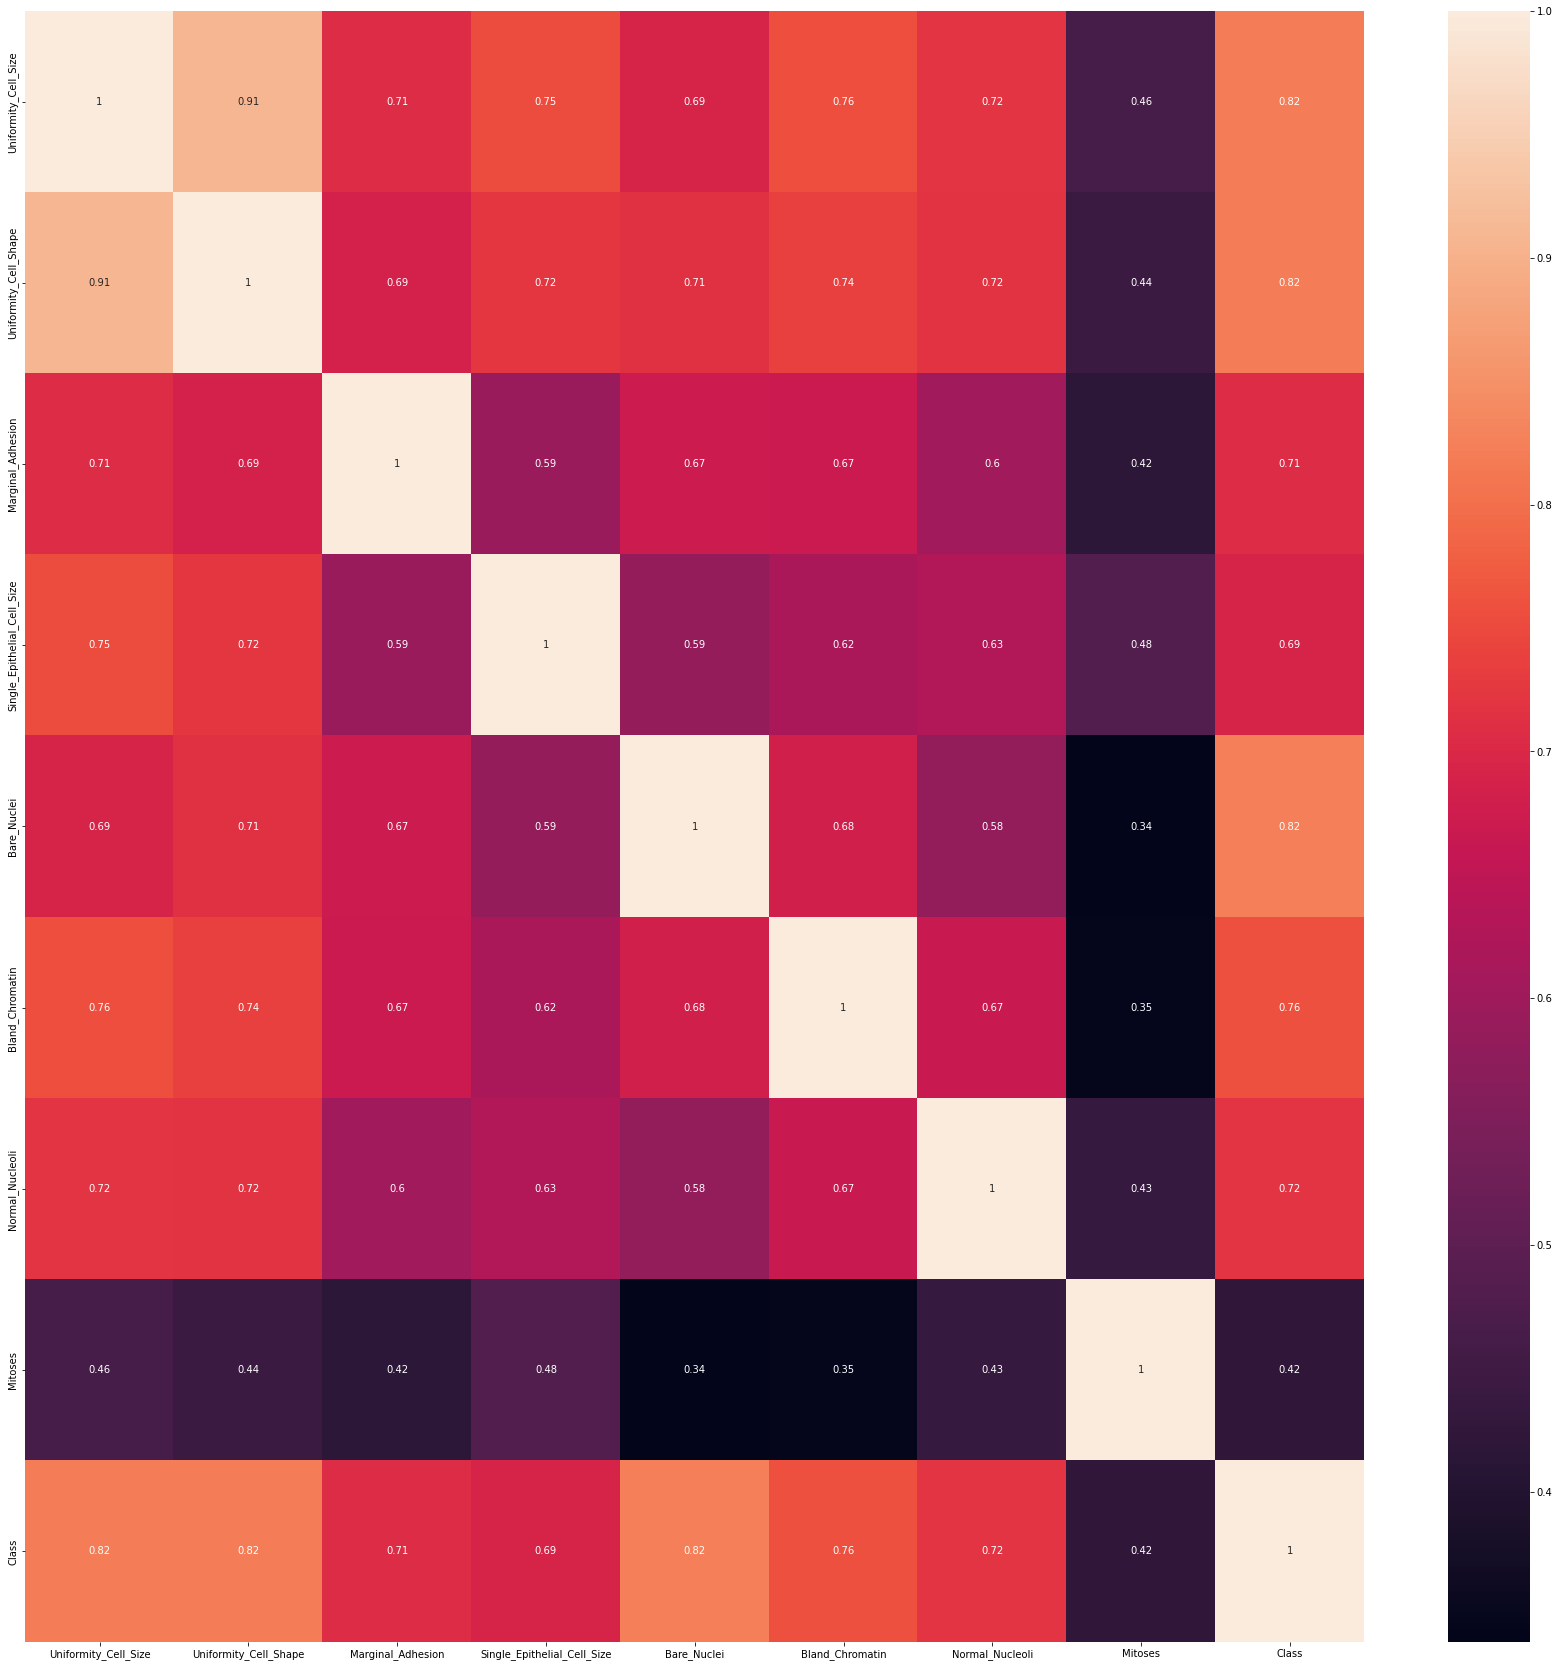

In [56]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot= True)

Plotting Histogram for our Data

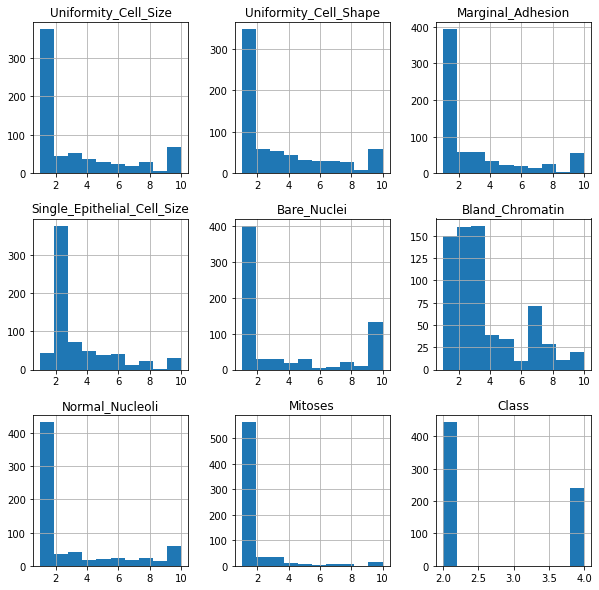

In [57]:
df.hist(figsize=(10,10))
plt.show()

Splitting our dataset for training

In [58]:
#print(df.loc[0])
X = np.array(df.drop(['Class'],1))
print(X[0])
y = np.array(df['Class'])
print(y[0])
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2) #a random split into training and test sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

[1 1 1 2 1 3 1 1]
2
(683, 8) (683,)
(546, 8) (546,)
(137, 8) (137,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [59]:
seed = 44 #not a random seed for reproducable results
scoring = 'accuracy'

Evaluating our Model

In [60]:
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))# odd value to avoid ties 

#Evaluate each model
results = []
names = []

for name,model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True) #run 10 times and select the best results
    cv_results =model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring) #fitting a model and computing the score
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg) #accuracy only on training data
print(results)

KNN: 0.959663 (0.032703)
[array([0.98181818, 0.98181818, 0.90909091, 0.98181818, 0.94545455,
       0.98181818, 0.98148148, 1.        , 0.90740741, 0.92592593])]


Checking our Model Score

In [61]:
for name,model in models:
    model.fit(X_train,y_train) #training the model
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions))

KNN
0.9708029197080292
              precision    recall  f1-score   support

           2       1.00      0.96      0.98        89
           4       0.92      1.00      0.96        48

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137



In [62]:
model.fit(X_train, y_train)

# save the model
import pickle
pickle.dump(model, open("model.pkl", "wb"))

# load the model
model = pickle.load(open("model.pkl", "rb"))

# use model to predict
example=np.array([[4,2,1,1,1,2,3,2]])
y_pred = model.predict(example)
print(y_pred)

[2]
